In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

----------------

In [2]:
#Analytics questions:
#1-What factors (features) affect test scores most?
#2-Are there interacting features which affect test scores?

In [3]:
df = pd.read_csv("Students Exam Scores.csv")

In [4]:
df

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,10-May,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,10-May,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,10-May,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,10-May,59,61,65
30637,890,male,group E,high school,standard,none,single,regularly,no,1.0,private,10-May,58,53,51
30638,911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,10-May,61,70,67
30639,934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,10-May,82,90,93


-------------

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
df.dtypes

Unnamed: 0               int64
Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

In [7]:
df.duplicated().sum()

0

---------------

##  Data Cleaning

In [8]:
df.drop_duplicates(inplace = True , ignore_index=True )

In [9]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
df.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [11]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Gender: 2 distinct values
EthnicGroup: 6 distinct values
ParentEduc: 7 distinct values
LunchType: 2 distinct values
TestPrep: 3 distinct values
ParentMaritalStatus: 5 distinct values
PracticeSport: 4 distinct values
IsFirstChild: 3 distinct values
NrSiblings: 9 distinct values
TransportMeans: 3 distinct values
WklyStudyHours: 4 distinct values
MathScore: 95 distinct values
ReadingScore: 90 distinct values
WritingScore: 93 distinct values


In [12]:
df['NrSiblings'] = df['NrSiblings'].astype(pd.Int64Dtype())

In [13]:
df.rename(columns={'TransportMeans': 'School_Bus'}, inplace=True)

-------------

## Mapping

In [14]:
study_mapping = {
    '< 5': 'Less than 5 hours',
    '5 - 10': 'Between 5-10 hours',
    '> 10': 'More than 10 hours'
}

value_mapping = {
    'no': 0,
    'yes': 1
}

test_mapping = {
    'none': 0,
    'completed': 1
}

bus_mapping = {
    'private': 0,
    'school_bus': 1
}

In [15]:
df['WklyStudyHours'] = df['WklyStudyHours'].map(study_mapping)
df['IsFirstChild'] = df['IsFirstChild'].map(value_mapping)
df['TestPrep'] = df['TestPrep'].map(test_mapping)
df['School_Bus'] = df['School_Bus'].map(bus_mapping)

In [16]:
df['IsFirstChild'] = df['IsFirstChild'].astype(pd.Int64Dtype())
df['TestPrep'] = df['TestPrep'].astype(pd.Int64Dtype())
df['School_Bus'] = df['School_Bus'].astype(pd.Int64Dtype())

---------------

## Missing Values Handling 

In [17]:
df.isnull().sum()

Gender                     0
EthnicGroup             1840
ParentEduc              1845
LunchType                  0
TestPrep                1830
ParentMaritalStatus     1190
PracticeSport            631
IsFirstChild             904
NrSiblings              1572
School_Bus              3134
WklyStudyHours         17201
MathScore                  0
ReadingScore               0
WritingScore               0
dtype: int64

In [18]:
df['EthnicGroup'] = df['EthnicGroup'].fillna(df['EthnicGroup'].mode()[0])
df['WklyStudyHours'] = df['WklyStudyHours'].fillna(df['WklyStudyHours'].mode()[0])
df['ParentEduc'] = df['ParentEduc'].fillna(df['ParentEduc'].mode()[0])
df['ParentMaritalStatus'] = df['ParentMaritalStatus'].fillna(df['ParentMaritalStatus'].mode()[0])
df['NrSiblings'] = df['NrSiblings'].fillna(df['NrSiblings'].mode()[0])
df['IsFirstChild'] = df['IsFirstChild'].fillna(df['IsFirstChild'].mode()[0])
df['PracticeSport'] = df['PracticeSport'].fillna(df['PracticeSport'].mode()[0])
df['TestPrep'] = df['TestPrep'].fillna(df['TestPrep'].mode()[0])
df['School_Bus'] = df['School_Bus'].fillna(df['School_Bus'].mode()[0])

-------------

## Describe the Data

In [19]:
df.describe().style.format("{:.2f}")

,TestPrep,IsFirstChild,NrSiblings,School_Bus,MathScore,ReadingScore,WritingScore
count,30641.00,30641.00,30641.00,30641.00,30641.00,30641.00,30641.00
mean,0.32,0.65,2.09,0.63,66.56,69.38,68.42
std,0.47,0.48,1.44,0.48,15.36,14.76,15.44
min,0.00,0.00,0.00,0.00,0.00,10.00,4.00
25%,0.00,0.00,1.00,0.00,56.00,59.00,58.00
50%,0.00,1.00,2.00,1.00,67.00,70.00,69.00
75%,1.00,1.00,3.00,1.00,78.00,80.00,79.00
max,1.00,1.00,7.00,1.00,100.00,100.00,100.00


C:\Users\Kika\AppData\Local\Temp\ipykernel_10428\883646087.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


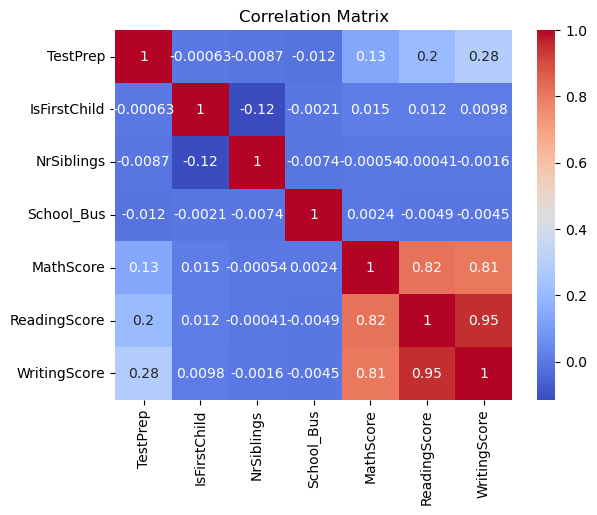

In [20]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [21]:
corr 

,TestPrep,IsFirstChild,NrSiblings,School_Bus,MathScore,ReadingScore,WritingScore
TestPrep,1.000000,-0.000626,-0.008701,-0.011914,0.134949,0.204724,0.282308
IsFirstChild,-0.000626,1.000000,-0.115089,-0.002126,0.014809,0.012117,0.009822
NrSiblings,-0.008701,-0.115089,1.000000,-0.007414,-0.000538,-0.000412,-0.001584
School_Bus,-0.011914,-0.002126,-0.007414,1.000000,0.002351,-0.004933,-0.004522
MathScore,0.134949,0.014809,-0.000538,0.002351,1.000000,0.817825,0.807118
ReadingScore,0.204724,0.012117,-0.000412,-0.004933,0.817825,1.000000,0.952584
WritingScore,0.282308,0.009822,-0.001584,-0.004522,0.807118,0.952584,1.000000


-------------

## Exploratory

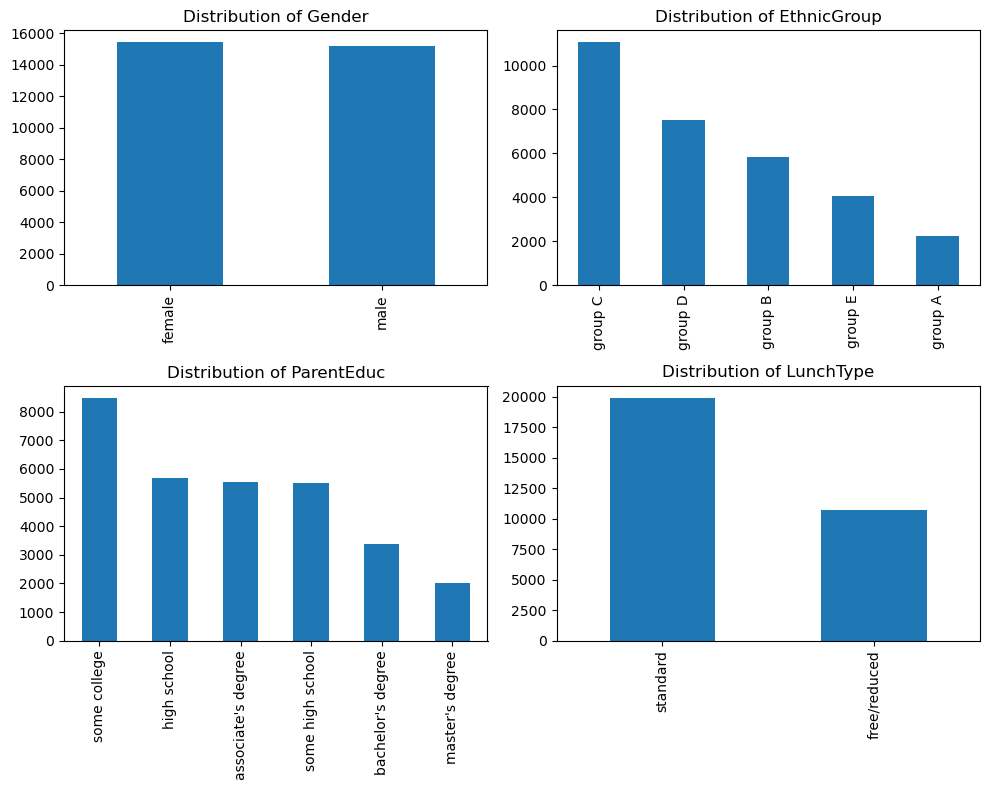

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType']
for i, col in enumerate(columns):
    ax = axs[i//2, i%2]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {col}")

plt.tight_layout()

plt.show()

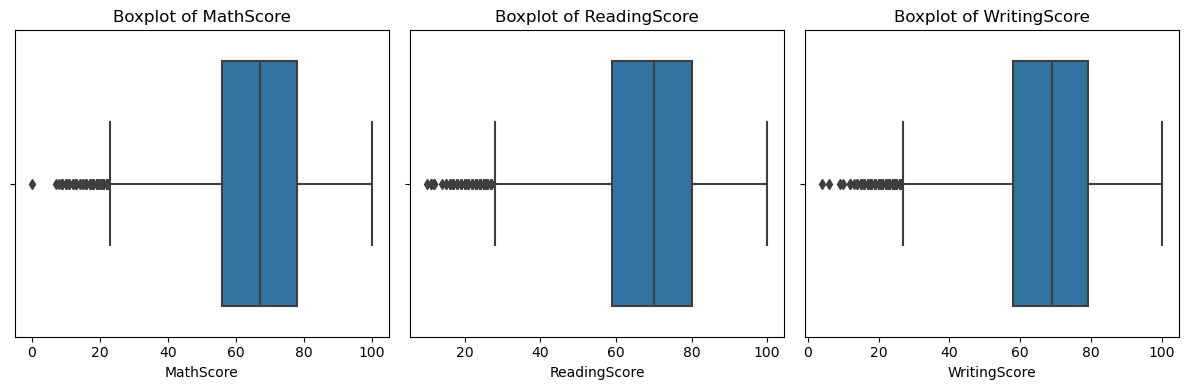

In [23]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

columns = ['MathScore', 'ReadingScore', 'WritingScore']
for i, col in enumerate(columns):
    ax = axs[i]
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(f"Boxplot of {col}")

plt.tight_layout()

plt.show()

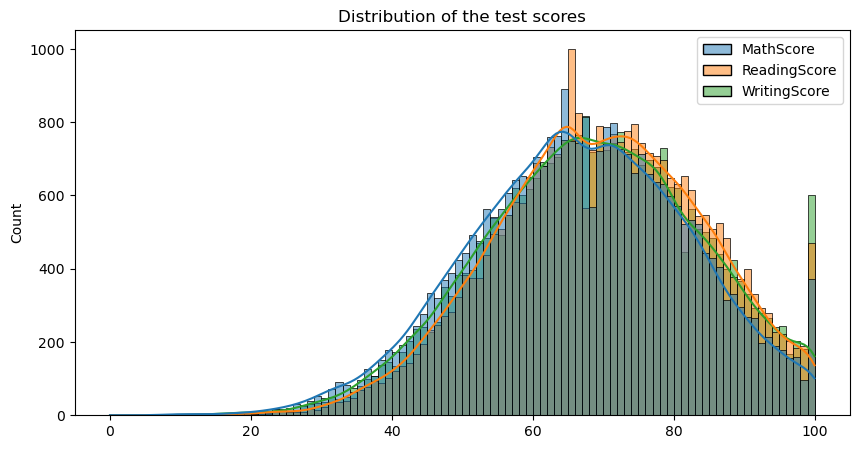

In [24]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df[['MathScore', 'ReadingScore', 'WritingScore']], bins=100,  kde=True)
plt.title('Distribution of the test scores');

---------------------

## Visualize & Analysis

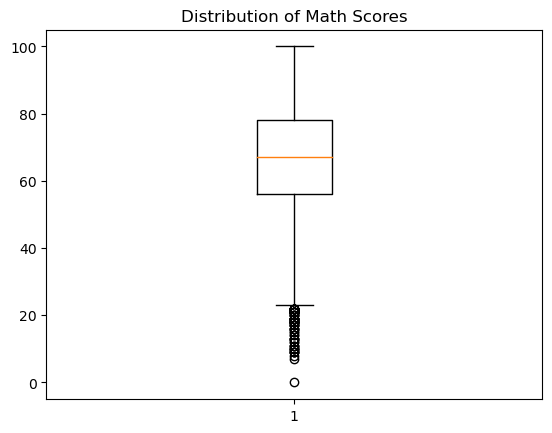

In [25]:
plt.boxplot(df['MathScore'])
plt.title('Distribution of Math Scores')
plt.show()

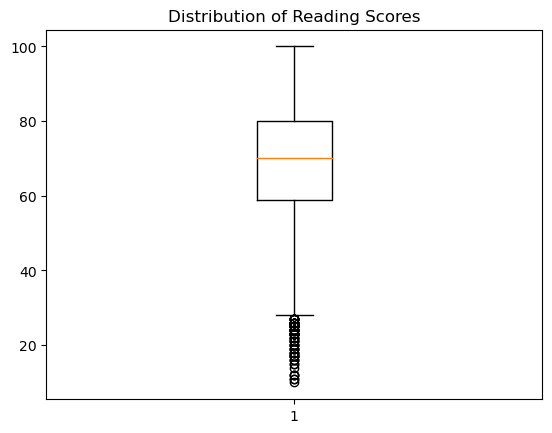

In [26]:
plt.boxplot(df['ReadingScore'])
plt.title('Distribution of Reading Scores')
plt.show()

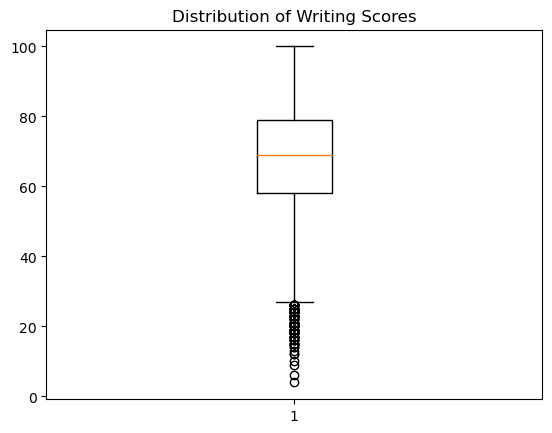

In [27]:
plt.boxplot(df['WritingScore'])
plt.title('Distribution of Writing Scores')
plt.show()

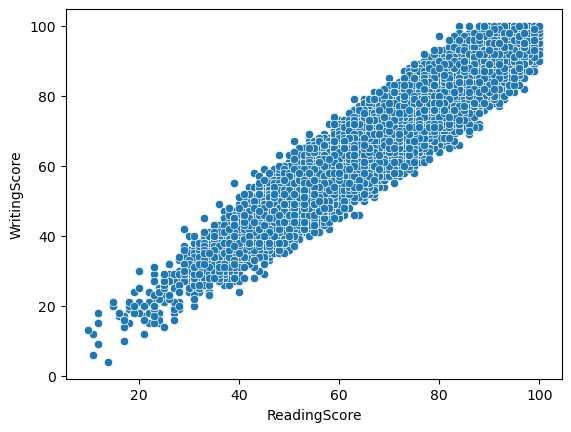

In [28]:
sns.scatterplot(x='ReadingScore', y='WritingScore', data=df)
plt.show()

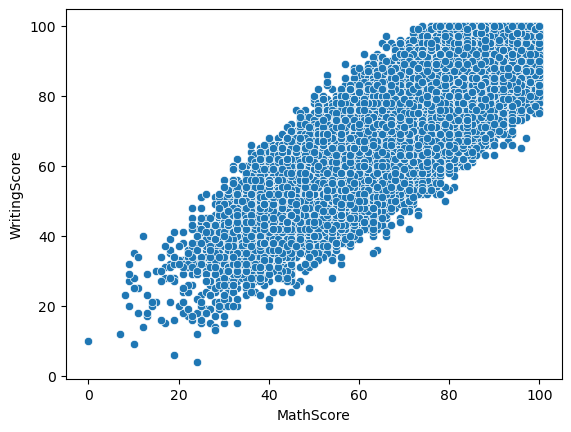

In [29]:
sns.scatterplot(x='MathScore', y='WritingScore', data=df)
plt.show()

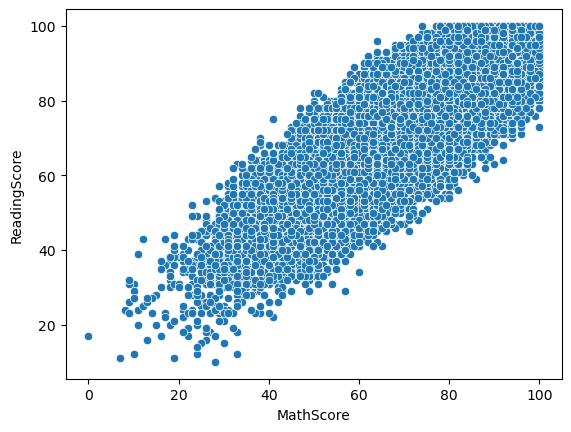

In [30]:
sns.scatterplot(x='MathScore', y='ReadingScore', data=df)
plt.show()

### Gender
The distribution of male and female students in the dataset is fairly balanced.
Score wise girls performed better that boys in ReadingScore and writingScore, whereas boys scored better in MathScore.

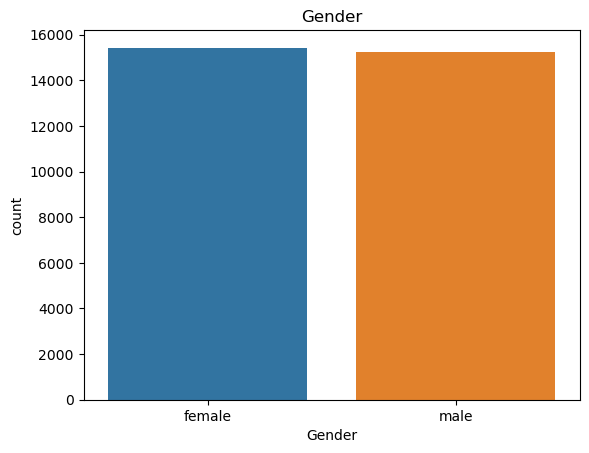

In [31]:
sns.countplot(x=df['Gender'])
plt.title('Gender');

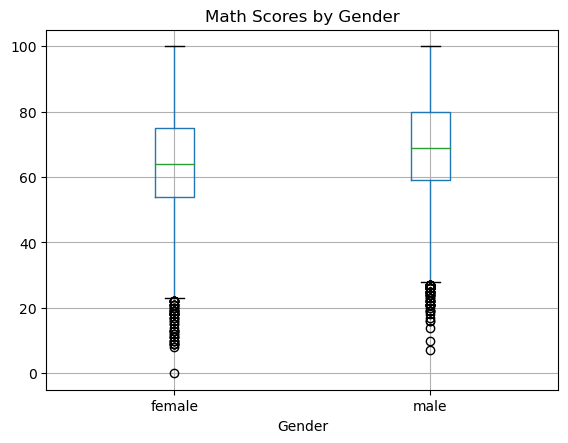

In [32]:
df.boxplot(column='MathScore', by='Gender')
plt.title('Math Scores by Gender')
plt.suptitle('')
plt.show()

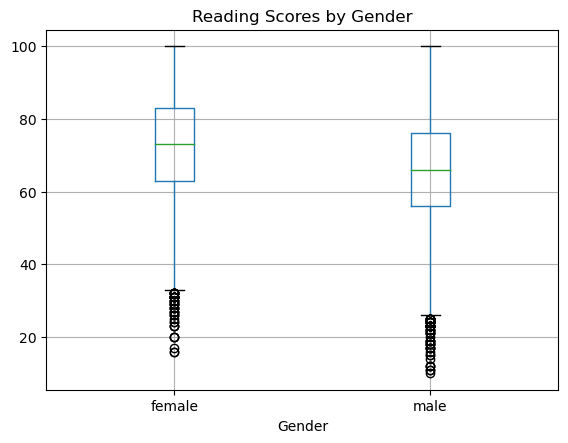

In [33]:
df.boxplot(column='ReadingScore', by='Gender')
plt.title('Reading Scores by Gender')
plt.suptitle('')
plt.show()

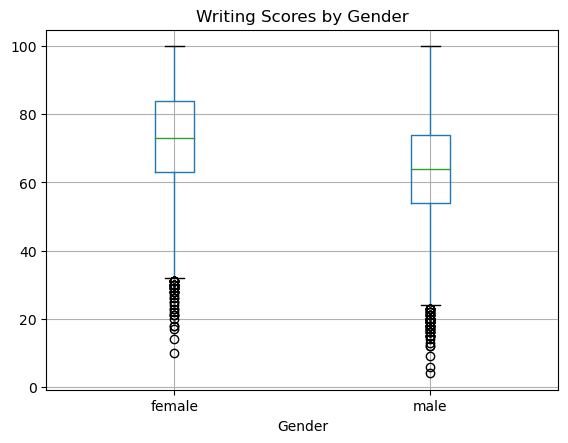

In [34]:
df.boxplot(column='WritingScore', by='Gender')
plt.title('Writing Scores by Gender')
plt.suptitle('')
plt.show()

## Ethnic group
There are five races/ethnic groups represented in the dataset from group A to group E
With 30% of the student population, race group C are the most represented whereas with only 10% race group A are the least.
The effect of race on students' performance is clear to see. Race group E students are by far the better performers having scored 7-points more than the second group D in math and 5 more points in reading score and close to 2 points in writing test. At the other end of the scoreboard we find race group A; this group scored more than 12-points on math lower than that of group E

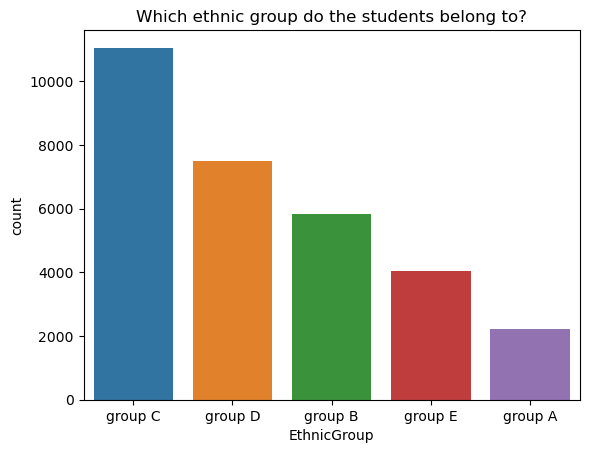

In [35]:
sns.countplot(x=df['EthnicGroup'], \
              order=['group C', 'group D', 'group B', 'group E', 'group A'])
plt.title('Which ethnic group do the students belong to?');

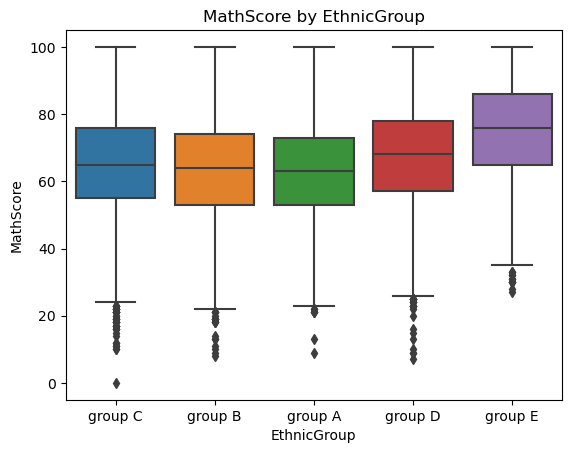

In [36]:
sns.boxplot(x='EthnicGroup', y='MathScore', data=df)
plt.title('MathScore by EthnicGroup')
plt.show()

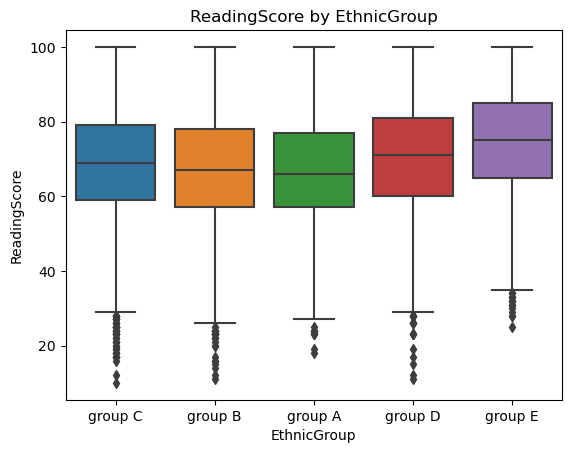

In [37]:
sns.boxplot( x='EthnicGroup', y='ReadingScore', data=df)
plt.title('ReadingScore by EthnicGroup')
plt.show()

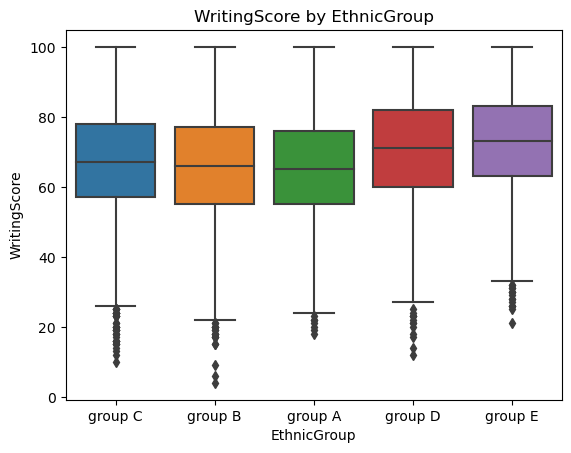

In [38]:
sns.boxplot( x='EthnicGroup', y='WritingScore', data=df)
plt.title('WritingScore by EthnicGroup')
plt.show()

In [39]:
df.groupby(['EthnicGroup', 'Gender'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

## Parents
There are six categories of educational background of parents of the students, ranging from masters education to highschool dropouts
When it comes to the students' test scores there seems to be a clear correlation with their parents educational background. Children of highly educated parents score better than the children of less educated parents. This pattern is seen consistently with all three test subjects.
This features seem to have little to no correlation with test scores.

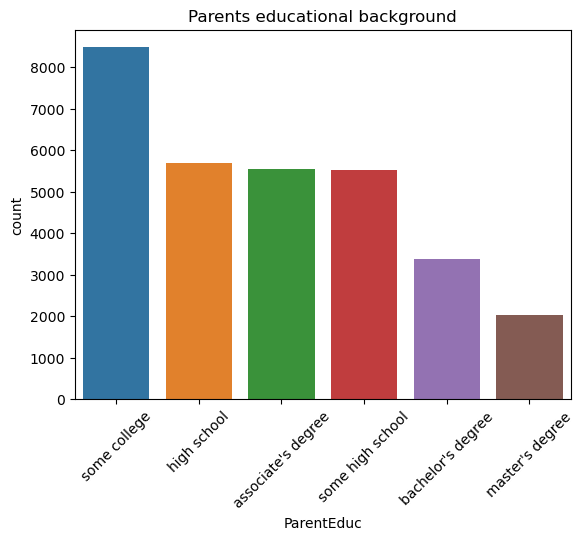

In [40]:
sns.countplot(x=df['ParentEduc'], \
              order=['some college', 'high school', "associate's degree", 'some high school', "bachelor's degree", "master's degree"])
plt.title('Parents educational background')
plt.xticks(rotation=45);

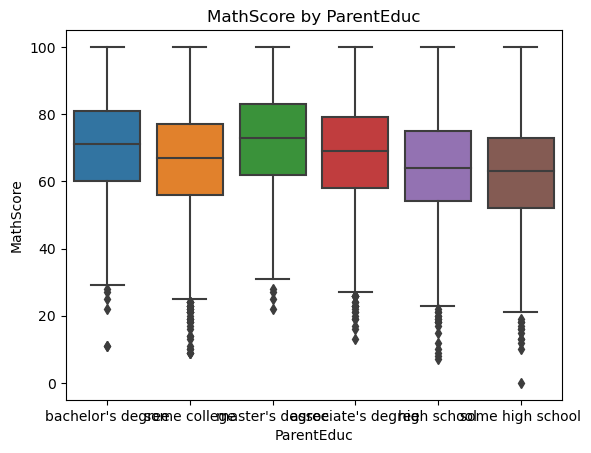

In [41]:
sns.boxplot( x='ParentEduc', y='MathScore', data=df)
plt.title('MathScore by ParentEduc')
plt.show()

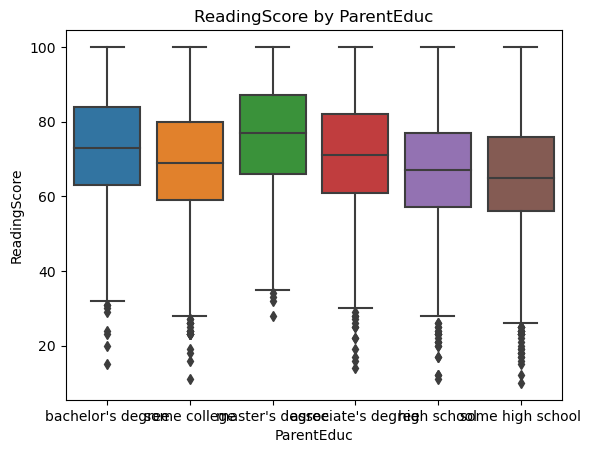

In [42]:
sns.boxplot( x='ParentEduc', y='ReadingScore', data=df)
plt.title('ReadingScore by ParentEduc')
plt.show()

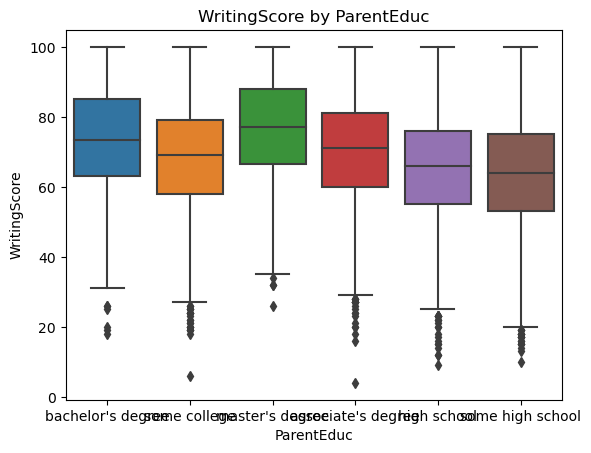

In [43]:
sns.boxplot( x='ParentEduc', y='WritingScore', data=df)
plt.title('WritingScore by ParentEduc')
plt.show()

In [44]:
df.groupby(['Gender', 'ParentEduc'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

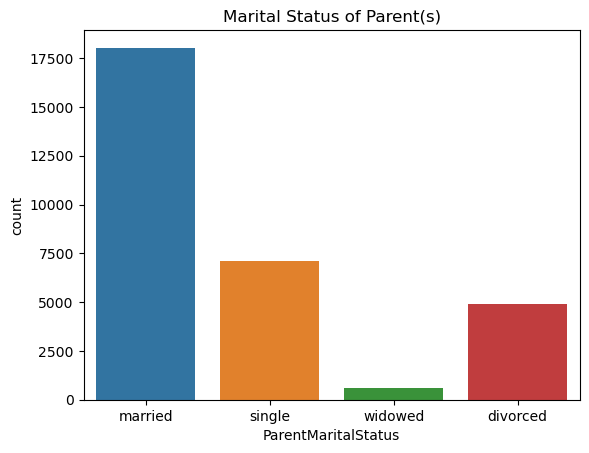

In [45]:
sns.countplot(x=df['ParentMaritalStatus'])
plt.title('Marital Status of Parent(s)');

In [46]:
df.groupby(['Gender', 'ParentMaritalStatus'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

## Lunch type
There are two types of luches students can have at school, standard or reduced/free lunch.
It appears that lunch type has a paramount effect on test scores. On math test score the difference between starndard and free lunch.

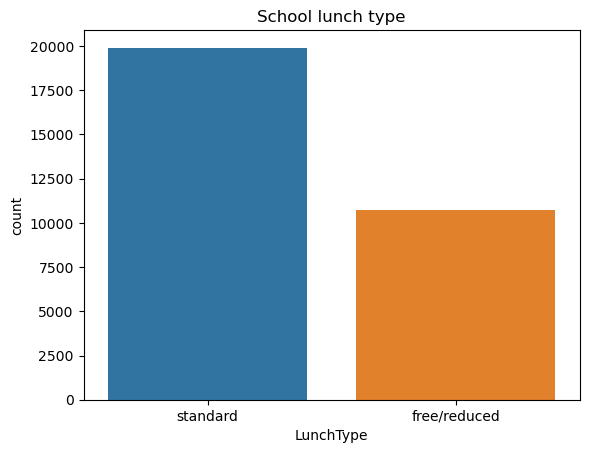

In [47]:
sns.countplot(x=df['LunchType'])
plt.title('School lunch type');

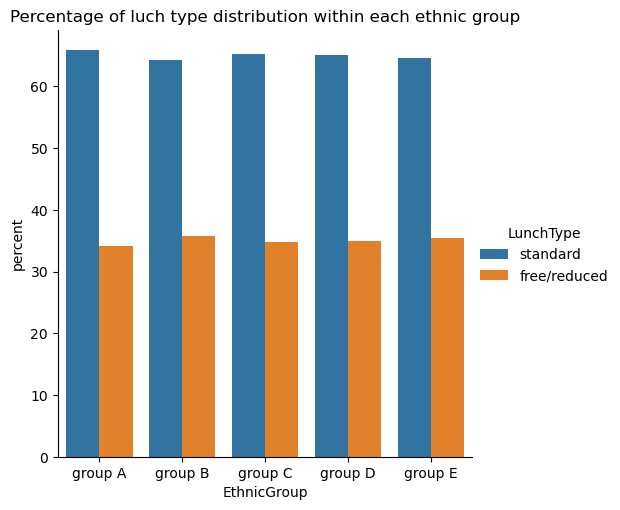

In [48]:
x, y = 'EthnicGroup', 'LunchType'
df.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()\
.pipe((sns.catplot,'data'), x=x,y='percent',hue=y,kind='bar')
plt.title('Percentage of luch type distribution within each ethnic group');

In [49]:
df.groupby(['EthnicGroup', 'LunchType'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

## Weekly study hours
This feature is a weekly study hours the students had been studying after school. There are three distinct values less that 5hrs a week, between 5 -10hrs per week and more than 10hrs per week.
Test score result shows that performance is direclty related to the hours spent studying.

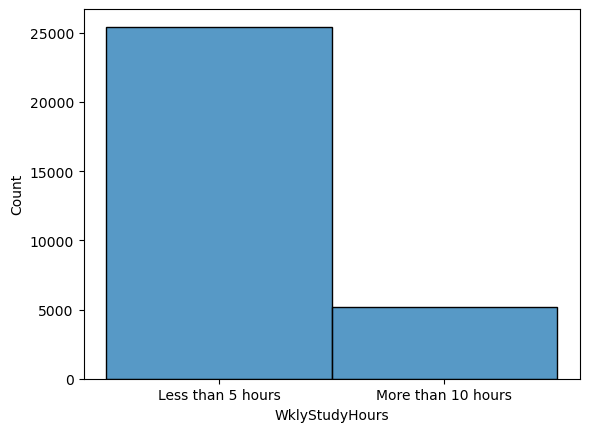

In [50]:
sns.histplot(x='WklyStudyHours', data=df)
plt.show()

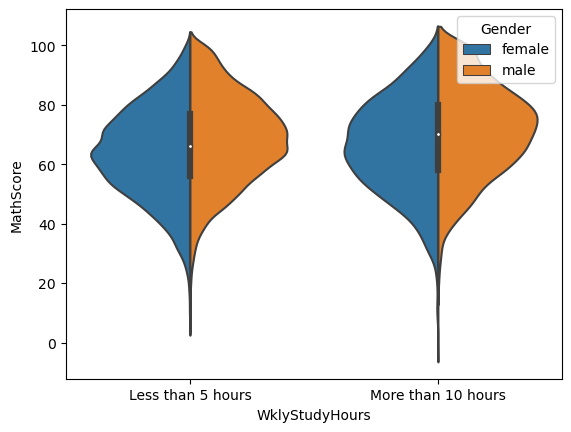

In [51]:
sns.violinplot( x='WklyStudyHours', y='MathScore', hue='Gender', data=df, split=True)
plt.show()

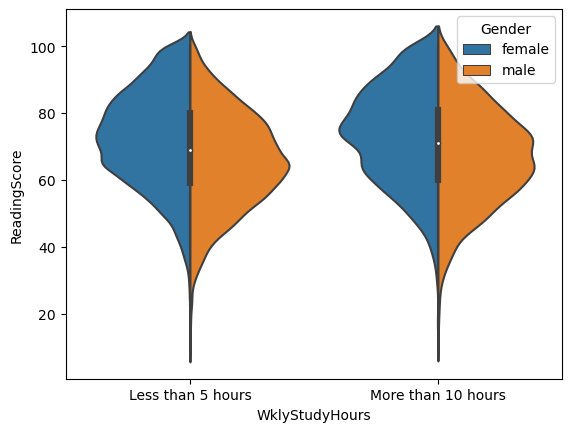

In [52]:
sns.violinplot( x='WklyStudyHours', y='ReadingScore', hue='Gender', data=df, split=True)
plt.show()

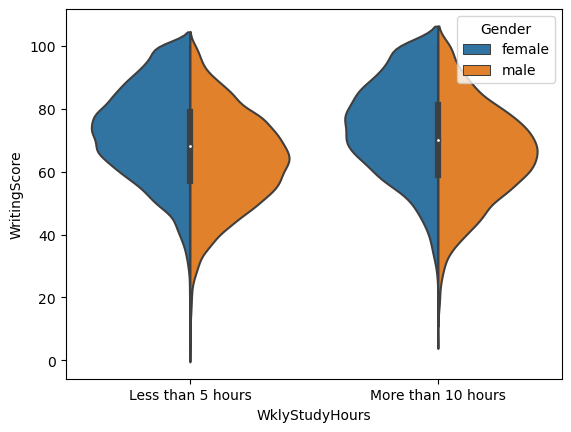

In [53]:
sns.violinplot( x='WklyStudyHours', y='WritingScore', hue='Gender', data=df, split=True)
plt.show()

In [54]:
df.groupby(['Gender', 'WklyStudyHours'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

## Test-prep course
Almost two-third of the student poppulation did not take a test preparation course.
Logically this features had also a positive impact on test score reading test inparticular was hight affected by test preparation course.

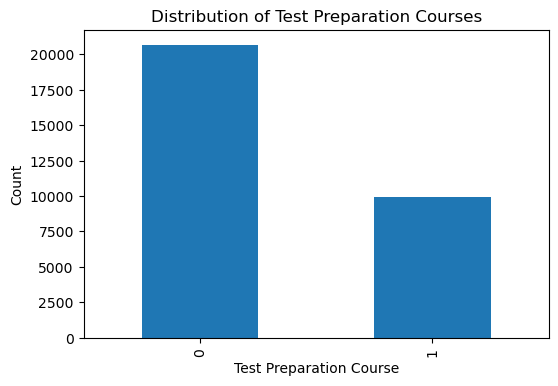

In [55]:
plt.figure(figsize=(6,4))
df['TestPrep'].value_counts().plot(kind='bar')
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')
plt.title('Distribution of Test Preparation Courses')
plt.show()

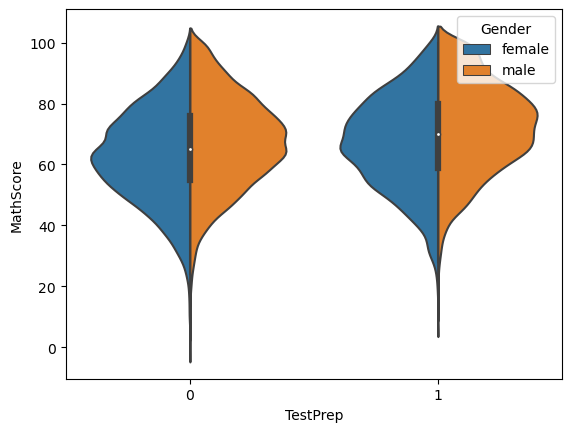

In [56]:
sns.violinplot( x='TestPrep', y='MathScore', hue='Gender', data=df, split=True)
plt.show()

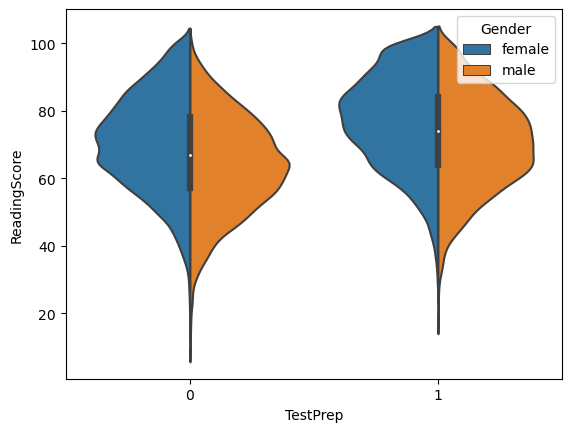

In [57]:
sns.violinplot( x='TestPrep', y='ReadingScore', hue='Gender', data=df, split=True)
plt.show()

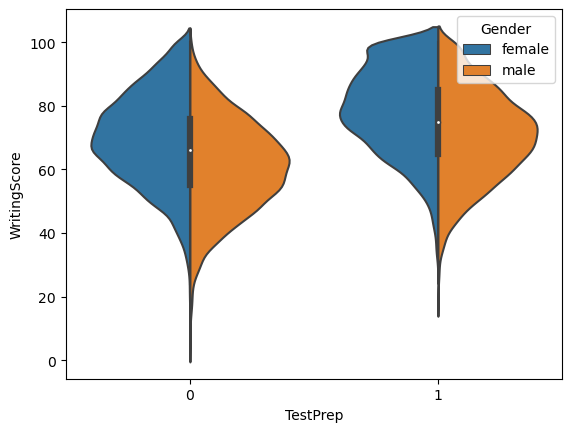

In [58]:
sns.violinplot( x='TestPrep', y='WritingScore', hue='Gender', data=df, split=True)
plt.show()

In [59]:
df.groupby(['Gender', 'TestPrep'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

##  First child in the family
About 65% of the students are first child in their family.
Scores are independent of this feature alone; changes are within < 0.5% in all the three test subjects.

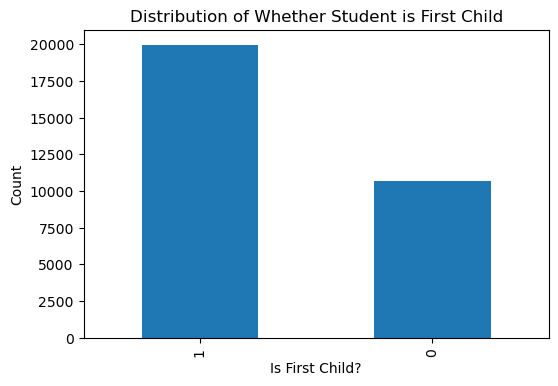

In [60]:
plt.figure(figsize=(6,4))
df['IsFirstChild'].value_counts().plot(kind='bar')
plt.xlabel('Is First Child?')
plt.ylabel('Count')
plt.title('Distribution of Whether Student is First Child')
plt.show()

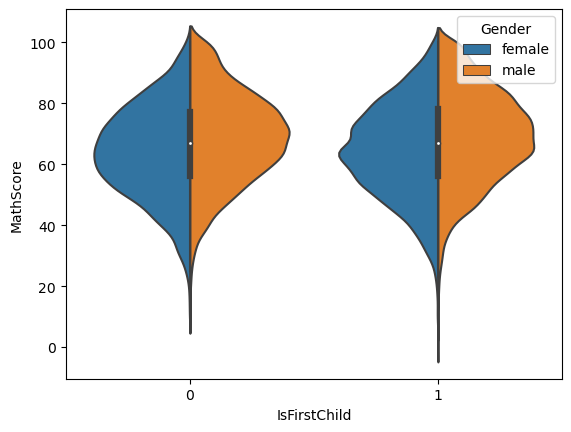

In [61]:
sns.violinplot( x='IsFirstChild', y='MathScore', hue='Gender', data=df, split=True)
plt.show()

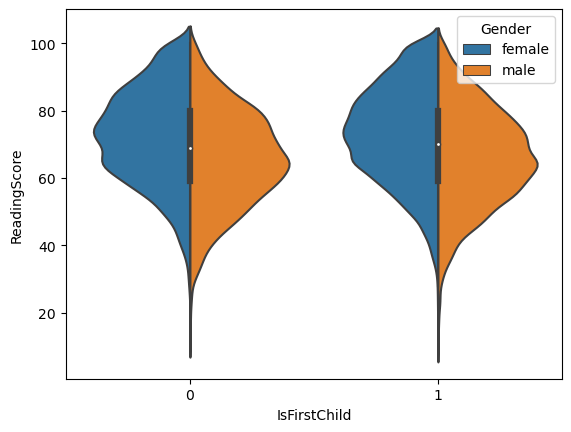

In [62]:
sns.violinplot( x='IsFirstChild', y='ReadingScore', hue='Gender', data=df, split=True)
plt.show()

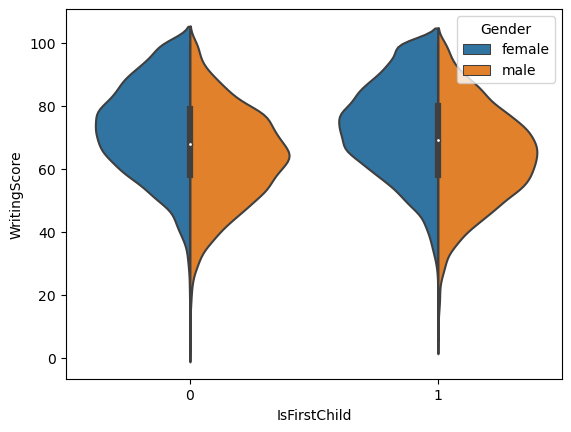

In [63]:
sns.violinplot( x='IsFirstChild', y='WritingScore', hue='Gender', data=df, split=True)
plt.show()

## Number of siblings
This feature has little to no effect on score. On writing and reading tests there is only just over 1 point difference and on math test about 1.7 points between two groups of students .

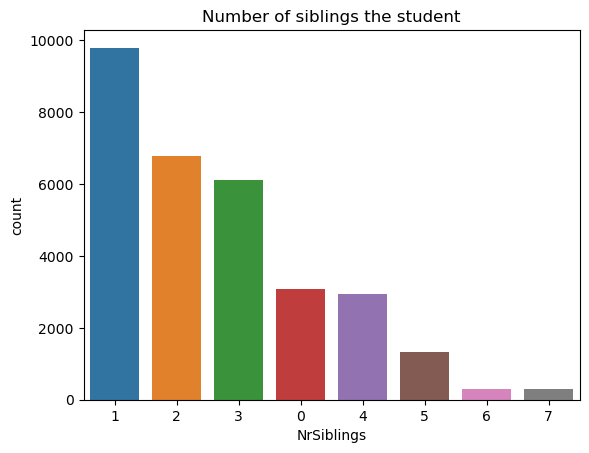

In [64]:
sns.countplot(x=df['NrSiblings'], order=[1, 2, 3, 0, 4, 5, 6, 7] )
plt.title('Number of siblings the student');

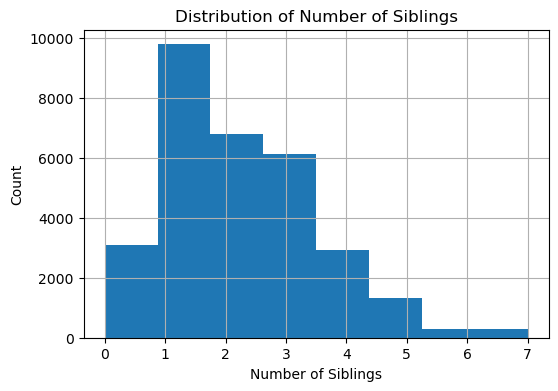

In [65]:
plt.figure(figsize=(6,4))
df['NrSiblings'].hist(bins=8)
plt.xlabel('Number of Siblings')
plt.ylabel('Count')
plt.title('Distribution of Number of Siblings')
plt.show()

In [66]:
df.groupby(['IsFirstChild', 'Gender', 'NrSiblings'])[['MathScore', 'ReadingScore', 'WritingScore']].agg(np.mean)\
.style.background_gradient(cmap='Blues')

------------------

## The Result

C:\Users\Kika\AppData\Local\Temp\ipykernel_10428\1631260679.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


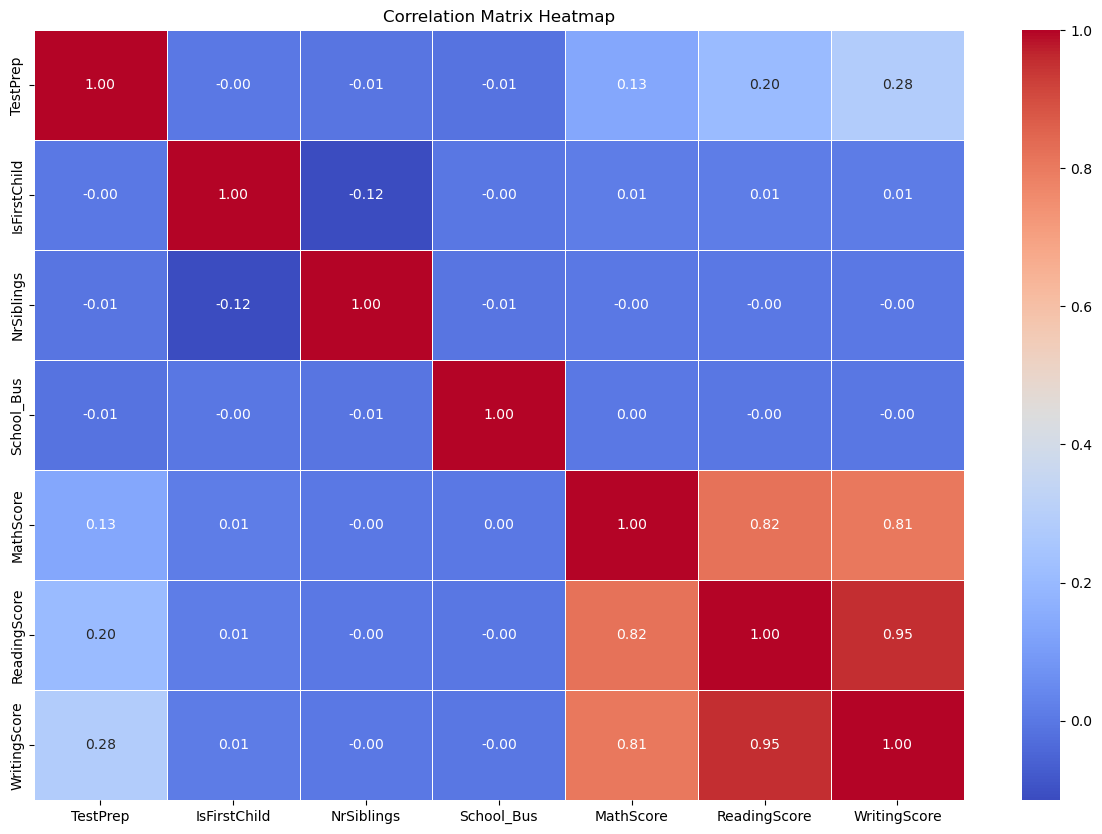

C:\Users\Kika\AppData\Local\Temp\ipykernel_10428\1631260679.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()
C:\Users\Kika\AppData\Local\Temp\ipykernel_10428\1631260679.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


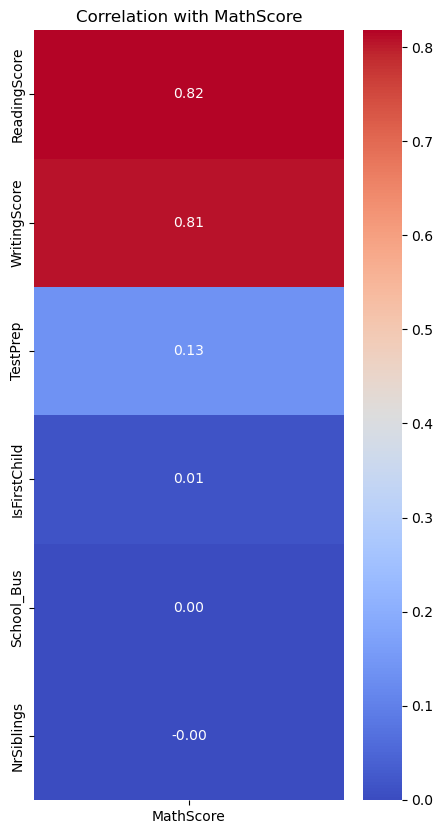

C:\Users\Kika\AppData\Local\Temp\ipykernel_10428\1631260679.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


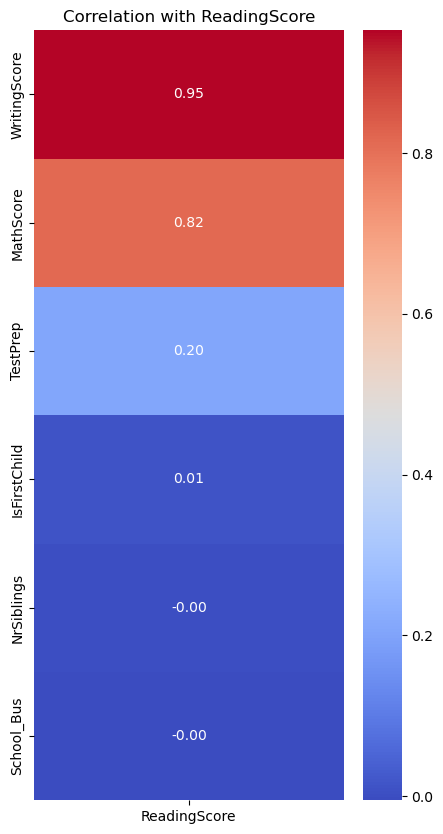

C:\Users\Kika\AppData\Local\Temp\ipykernel_10428\1631260679.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


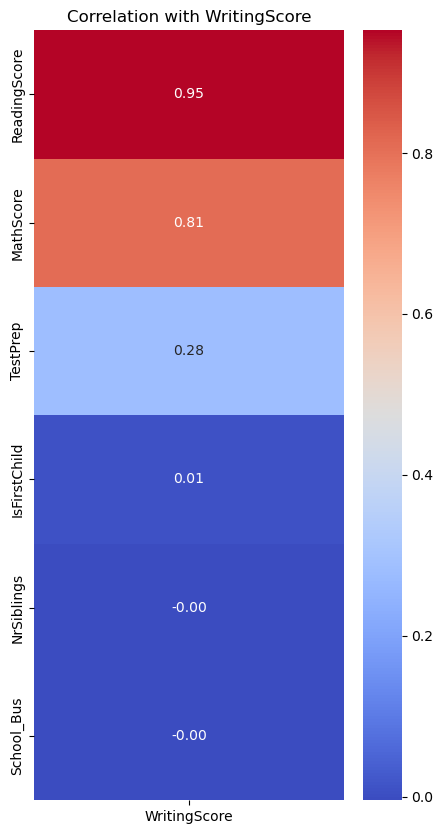

In [67]:
correlation_matrix = df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

correlation_matrix = df.corr()

for score_column in ['MathScore', 'ReadingScore', 'WritingScore']:
    corr = df.corr()
    target_corr = corr[score_column].drop(score_column)

    target_corr_sorted = target_corr.sort_values(ascending=False)

    plt.figure(figsize=(5, 10))
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
    plt.title(f'Correlation with {score_column}')
    plt.show()

In [68]:
'''
Results:

-I have just skimmed over most of the features and tried to show their effect on the test score of the three subjects.

-All three scores (MathScore, ReadingScore, and WritingScore) are highly correlated with each other.

-This is expected as students who do well in one subject often tend to do well in others.

-It suggests that common factors like overall study habits, intelligence,
or the quality of their education are influencing all three scores.

-TestPrep has a positive correlation with all three scores.

-This suggests that students who took a test preparation course tend to have higher scores.
The strongest correlation is with the WritingScore.

-The LunchType shows a significant correlation with all three scores,
with students having a standard lunch tending to score higher.

-This could be a proxy for socio-economic status.

-The EthnicGroup has varied correlations with the scores.

-Group E tends to have a positive correlation, especially with MathScore,
indicating that this group tends to have higher scores. On the other hand,
Group B and C show a negative correlation with the scores,
indicating that these groups tend to have lower scores.

-Parent education level (ParentEduc) also shows a correlation with the scores.

-Specifically, students whose parents have a Master's degree tend to have higher scores.

-In contrast, students whose parents only finished High school tend to have lower scores.

-This could be another proxy for socio-economic status or it could be that higher-educated parents are better able to support their children's education.

-Gender also plays a role, with female students tending to score higher in Reading and Writing while male students score higher in Math.
This is consistent with common gender stereotypes.

'''

"\nResults:\n\n-I have just skimmed over most of the features and tried to show their effect on the test score of the three subjects.\n\n-All three scores (MathScore, ReadingScore, and WritingScore) are highly correlated with each other.\n\n-This is expected as students who do well in one subject often tend to do well in others.\n\n-It suggests that common factors like overall study habits, intelligence,\nor the quality of their education are influencing all three scores.\n\n-TestPrep has a positive correlation with all three scores.\n\n-This suggests that students who took a test preparation course tend to have higher scores.\nThe strongest correlation is with the WritingScore.\n\n-The LunchType shows a significant correlation with all three scores,\nwith students having a standard lunch tending to score higher.\n\n-This could be a proxy for socio-economic status.\n\n-The EthnicGroup has varied correlations with the scores.\n\n-Group E tends to have a positive correlation, especially 